# アニメ顔検出

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import sys; sys.path.append('/home/kagamiwomiru/Tools/GetImages/ToolKit')
import ConvertTo32 as CT

In [4]:
# 特徴量ファイルをもとに分類器を作成
# https://github.com/nagadomi/lbpcascade_animeface 
classifier = cv2.CascadeClassifier('cascades/lbpcascade_animeface.xml')

In [5]:
# 画像読み込み
image = cv2.imread('./data/Kizuna+Ai/0_1.jpg')

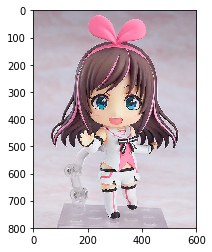

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [7]:
# グレースケールで処理を高速化
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [8]:
faces = classifier.detectMultiScale(image)

In [9]:
faces

array([[148, 200, 317, 317]], dtype=int32)

In [10]:
# ディレクトリを作成
output_dir = 'faces'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, (x,y,w,h) in enumerate(faces):
    # 一人ずつ顔を切り抜く
    face_image = image[y:y+h, x:x+w]
    now = datetime.datetime.now()
    output_path = os.path.join(output_dir,'{0:%Y%m%d_%H%M%S}.jpg'.format(now))
    cv2.imwrite(output_path,face_image)

## 画像の加工

In [12]:
CT.convertTo32(output_dir)

# 初期化

In [66]:
%%bash
rm -rf ./faces